##Pymaceuticals Analysis

  *Capomulin was the most effective drug, as it was the only drug that decreased tumor volume, had the lowest metastatic growth, and had the highest mouse survival rate over the treatment period.
  
  *Ketapril may have a negative impact, as it had the higest tumor volume growth - higher even than the placebo.  It had similar metastatic growth and mouse survival to the placebo group.
  
  *Although Infubinol did not have metastatic growth as high as Ketapril and the placebo, its mouse survival rate was the lowest of all four groups.


In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(drug_data,mouse_data,on='Mouse ID',how='inner')

# Display the data table for preview
combined_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint = combined_data.groupby(["Drug","Timepoint"])
mean_volume_drug = drug_timepoint["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_mean = pd.DataFrame({"Tumor Volume (mm3)":mean_volume_drug})
tumor_volume_mean.reset_index(inplace=True)

# Preview DataFrame
tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_timepoint = combined_data.groupby(["Drug","Timepoint"])
sem_volume_drug = drug_timepoint["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_sem = pd.DataFrame({"Tumor Volume (mm3)":sem_volume_drug})
tumor_volume_sem.reset_index(inplace=True)

# Preview DataFrame
tumor_volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean = tumor_volume_mean.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_volume_sem = tumor_volume_sem.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_volume_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


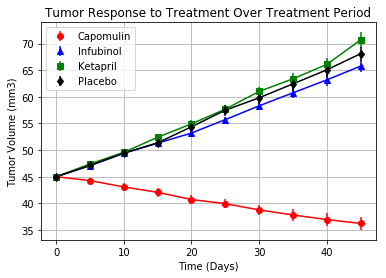

In [10]:
# Generate the Plot (with Error Bars)
x_axis = tumor_volume_mean.index.values

capomulin_vol = tumor_volume_mean.iloc[:,0]
cap_vol_err = tumor_volume_sem.iloc[:,0]

infubinol_vol = tumor_volume_mean.iloc[:,2]
inf_vol_err = tumor_volume_sem.iloc[:,2]

ketapril_vol = tumor_volume_mean.iloc[:,3]
ket_vol_err = tumor_volume_sem.iloc[:,3]

placebo_vol = tumor_volume_mean.iloc[:,5]
pla_vol_err = tumor_volume_sem.iloc[:,5]

fig, ax = plt.subplots()

ax.errorbar(x_axis, capomulin_vol, yerr=cap_vol_err, fmt="o", color="red",label="Capomulin")
ax.plot(x_axis,capomulin_vol,color="red",label="")

ax.errorbar(x_axis, infubinol_vol, yerr=inf_vol_err, fmt="^", color="blue",label="Infubinol")
ax.plot(x_axis,infubinol_vol,color="blue",label="")

ax.errorbar(x_axis, ketapril_vol, yerr=ket_vol_err, fmt="s", color="green",label="Ketapril")
ax.plot(x_axis,ketapril_vol,color="green",label="")

ax.errorbar(x_axis, placebo_vol, yerr=pla_vol_err, fmt="d", color="black",label="Placebo")
ax.plot(x_axis,placebo_vol,color="black",label="")

plt.grid()
plt.legend()
plt.title("Tumor Response to Treatment Over Treatment Period")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("charts/Tumor_Response.png")
plt.show()


## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites_drug = drug_timepoint["Metastatic Sites"].mean()

# Convert to DataFrame
met_sites_mean = pd.DataFrame({"Metastatic Sites":mean_met_sites_drug})
met_sites_mean.reset_index(inplace=True)

# Preview DataFrame
met_sites_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites_drug = drug_timepoint["Metastatic Sites"].sem()

# Convert to DataFrame
met_sites_sem = pd.DataFrame({"Metastatic Sites":sem_met_sites_drug})
met_sites_sem.reset_index(inplace=True)

# Preview DataFrame
met_sites_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
met_sites_sem = met_sites_sem.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
met_sites_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


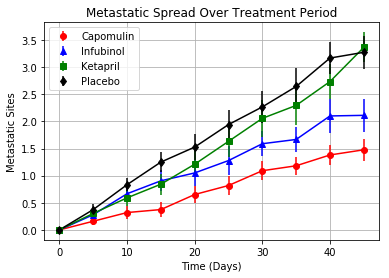

In [14]:
# Generate the Plot (with Error Bars)
x_axis = met_sites_mean.index.values

capomulin_sites = met_sites_mean.iloc[:,0]
cap_sites_err = met_sites_sem.iloc[:,0]

infubinol_sites = met_sites_mean.iloc[:,2]
inf_sites_err = met_sites_sem.iloc[:,2]

ketapril_sites = met_sites_mean.iloc[:,3]
ket_sites_err = met_sites_sem.iloc[:,3]

placebo_sites = met_sites_mean.iloc[:,5]
pla_sites_err = met_sites_sem.iloc[:,5]

fig, ax = plt.subplots()

ax.errorbar(x_axis, capomulin_sites, yerr=cap_sites_err, fmt="o", color="red",label="Capomulin")
ax.plot(x_axis,capomulin_sites,color="red",label="")

ax.errorbar(x_axis, infubinol_sites, yerr=inf_sites_err, fmt="^", color="blue",label="Infubinol")
ax.plot(x_axis,infubinol_sites,color="blue",label="")

ax.errorbar(x_axis, ketapril_sites, yerr=ket_sites_err, fmt="s", color="green",label="Ketapril")
ax.plot(x_axis,ketapril_sites,color="green",label="")

ax.errorbar(x_axis, placebo_sites, yerr=pla_sites_err, fmt="d", color="black",label="Placebo")
ax.plot(x_axis,placebo_sites,color="black",label="")

plt.grid()
plt.legend()
plt.title("Metastatic Spread Over Treatment Period")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

# Save the Figure
plt.savefig("charts/Metastatic_Sites.png")
plt.show()


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = drug_timepoint["Mouse ID"].count()

# Convert to DataFrame
mice = pd.DataFrame({"Mouse Count":mouse_count})
mice.reset_index(inplace=True)

# Preview DataFrame
mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice = mice.pivot(index="Timepoint",columns="Drug",values="Mouse Count")

# Preview the Data Frame
mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


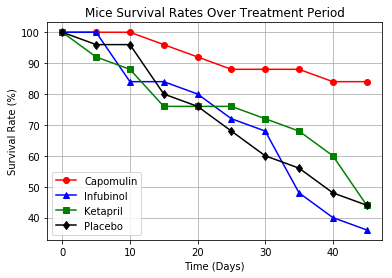

In [17]:
# Generate the Plot (Accounting for percentages)
x_axis = mice.index.values

cap_mice_count = mice.iloc[:,0]
cap_mice_begin = mice.iloc[0,0]
cap_mice_pct = [remaining/cap_mice_begin*100 for remaining in cap_mice_count]

inf_mice_count = mice.iloc[:,2]
inf_mice_begin = mice.iloc[0,2]
inf_mice_pct = [remaining/inf_mice_begin*100 for remaining in inf_mice_count]

ket_mice_count = mice.iloc[:,3]
ket_mice_begin = mice.iloc[0,3]
ket_mice_pct = [remaining/ket_mice_begin*100 for remaining in ket_mice_count]

pla_mice_count = mice.iloc[:,5]
pla_mice_begin = mice.iloc[0,5]
pla_mice_pct = [remaining/pla_mice_begin*100 for remaining in pla_mice_count]

fig, ax = plt.subplots()

ax.plot(x_axis,cap_mice_pct,color="red",label="Capomulin",marker="o")
ax.plot(x_axis,inf_mice_pct,color="blue",label="Infubinol",marker="^")
ax.plot(x_axis,ket_mice_pct,color="green",label="Ketapril",marker="s")
ax.plot(x_axis,pla_mice_pct,color="black",label="Placebo",marker="d")

plt.grid()
plt.title("Mice Survival Rates Over Treatment Period")
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("charts/Mice_Survuval.png")
plt.show()



## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
beg_vol = tumor_volume_mean.loc[0]
end_vol = tumor_volume_mean.loc[45]

pct_change = (end_vol - beg_vol) / beg_vol * 100

# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

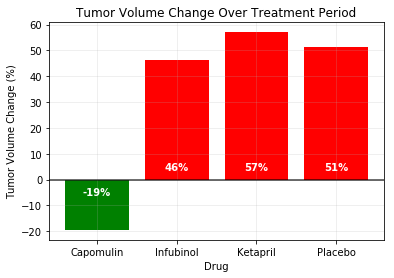

In [19]:
# Create lists of relevant data
changes = [pct_change[0],pct_change[2],pct_change[3],pct_change[5]]
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis = np.arange(len(drugs))

#Create lists of growth vs. shrinkage
growth = [0 if change < 0 else change for change in changes]
shrinkage = [0 if change > 0 else change for change in changes]

#Create bar graph
fig, ax = plt.subplots()

bars1 = ax.bar(x_axis,growth,color="red",align="center")
bars2 = ax.bar(x_axis,shrinkage,color="green",align="center")

plt.xticks(x_axis,drugs)

plt.hlines(0,-.6,3.6,alpha=.75)
plt.xlim(-.6,3.6)
plt.grid(alpha=.25)
plt.title("Tumor Volume Change Over Treatment Period")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume Change (%)")


#Add data labels
def datalabels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2,5,f"{int(height)}%",horizontalalignment="center",
                    verticalalignment="center",color="white",fontweight="bold")
        elif height < 0:
            ax.text(bar.get_x() + bar.get_width()/2,-5,f"{int(height)}%",horizontalalignment="center",
                    verticalalignment="center",color="white",fontweight="bold")
datalabels(bars1)
datalabels(bars2)

# Save the Figure
plt.savefig("charts/Tumor_Growth.png")
plt.show()
